In [1]:
# Libraries

import numpy as np
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt

In [21]:
# Importing our dataset

df_p = pd.read_csv("../new_data_def/puerto_rico.csv")
df_d = pd.read_csv('../new_data_def/dominican_republic_country.csv')
df_e = pd.read_csv('../new_data_def/el_salvador_country.csv')

dfs = [df_p, df_d, df_e]
features = pd.DataFrame(columns=['time', 'third_last','second_last','last', 'population'])
label = np.array([])
for i, df in enumerate(dfs) :

    X = df.iloc[:, 0].values
    y = df.iloc[:, 4].values
    
    label = np.append(label,y)
    
    if i == 0: population = 3283121
    elif i == 1 : population = 1063000
    elif i == 2 : population = 6421000

    initial_date = X[0]
        
    for n, values in enumerate(X) :
        X[n] = int((datetime.datetime.strptime(values, "%Y-%m-%d").timestamp() - datetime.datetime.strptime(initial_date, "%Y-%m-%d").timestamp())/86400)
    #print(X)


    for index, row in enumerate(y):
        if index==2:
            tab = [0,y[index-2],y[index-1]]
        elif index == 1:
            tab = [0,0,y[index-1]]
        elif index == 0:
            tab = [0,0,0]
        else :
            tab = [y[index-3],y[index-2],y[index-1]]
        new_row = {'time':X[index], 'third_last':tab[0], 'second_last':tab[1], 'last':tab[2], 'population' : population}
        features = features.append(new_row, ignore_index=True)
        
    if i == 0 :
        X_test_p = np.array(features)

X = np.array(features)
y = label
feature_list = list(features.columns)

print(feature_list)

['time', 'third_last', 'second_last', 'last', 'population']


In [24]:
# Splitting into training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_test_p = np.intersect1d(X_test[:,0], X_test_p[:,0])
      
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (193, 5)
Training Labels Shape: (193,)
Testing Features Shape: (49, 5)
Testing Labels Shape: (49,)


In [5]:
# Fitting random forest regression to the dataset

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=3)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_errors = abs(rf_pred - y_test)

# Get numerical feature importances

importances = list(rf.feature_importances_)# List of tuples with variable and importance

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

print('Mean Absolute Error:', round(np.mean(rf_errors), 2), 'cases.')
print('R Squared for Random Forest :', r2_score(y_test, rf_pred))


Variable: last                 Importance: 0.89
Variable: second_last          Importance: 0.05
Variable: third_last           Importance: 0.03
Variable: time                 Importance: 0.02
Variable: population           Importance: 0.0
Mean Absolute Error: 155.69 cases.
R Squared for Random Forest : 0.9841916554805281


In [6]:
# Fitting Gradient boosting regression to the dataset

from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(n_estimators=600, max_depth=5, learning_rate=0.01, min_samples_split=3)
gbm.fit(X_train, y_train)

gbm_pred = gbm.predict(X_test)
gbm_errors = abs(gbm_pred - y_test)

# Get numerical feature importances

importances = list(gbm.feature_importances_)# List of tuples with variable and importance

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

print('Mean Absolute Error:', round(np.mean(gbm_errors), 2), 'cases.')
print('R Squared for Gradient Boosting :', r2_score(y_test, gbm_pred))


Variable: last                 Importance: 0.91
Variable: second_last          Importance: 0.04
Variable: time                 Importance: 0.03
Variable: third_last           Importance: 0.02
Variable: population           Importance: 0.0
Mean Absolute Error: 150.31 cases.
R Squared for Gradient Boosting : 0.9869395215940732


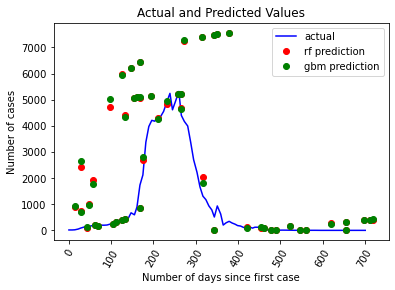

In [7]:
plt.plot(X[0:89,0], y[0:89], 'b-', label = 'actual')
plt.plot(X_test[0:89,0], rf.predict(X_test, 'ro', label = 'rf prediction')
plt.plot(X_test[0:89,0], gbm_pred, 'go', label = 'gbm prediction')
plt.xticks(rotation = '60'); 
plt.legend()

plt.xlabel('Number of days since first case'); 
plt.ylabel('Number of cases'); 
plt.title('Actual and Predicted Values');